In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list, to_tree, cut_tree, leaders
from matplotlib import pyplot as plt
import numpy as np
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

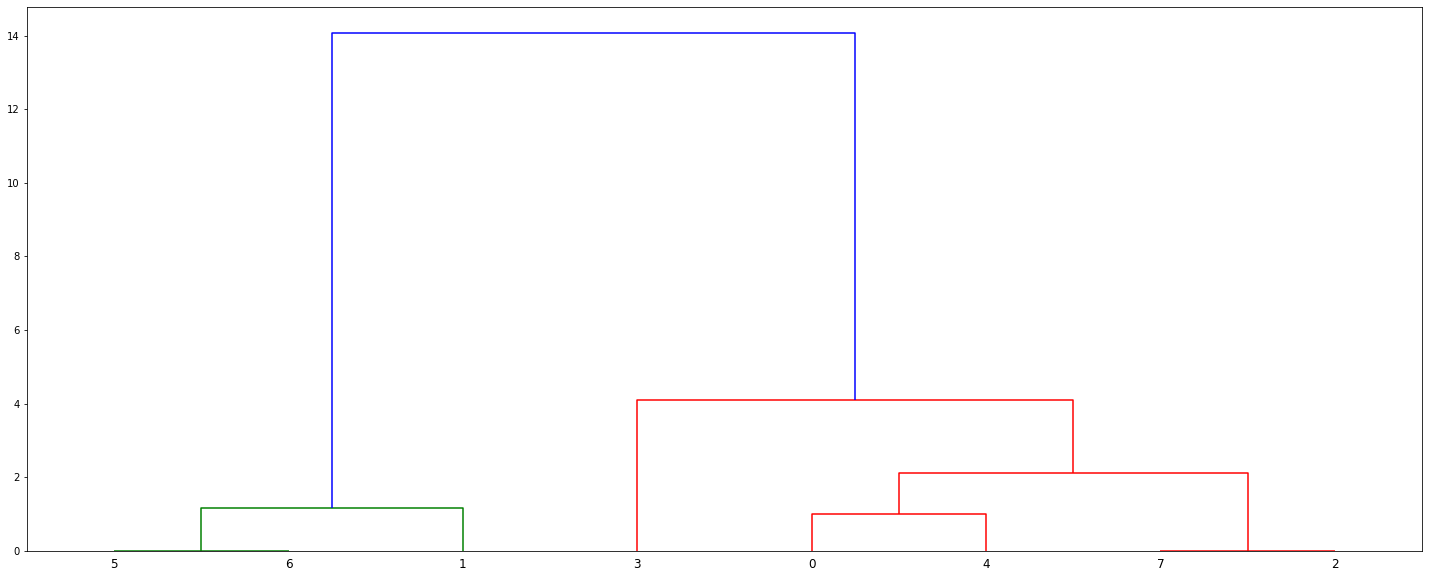

In [3]:
Z = linkage(X, 'ward', optimal_ordering = True)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [3]:
Z.shape

(7, 4)

In [4]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 7.        ,  2.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 8.        ,  1.        ,  1.15470054,  3.        ],
       [10.        ,  9.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

Para ver que elementos hay en el nodo 13, hay que calcular $13 - 8$

In [5]:
Z[13-8]

array([ 3.        , 12.        ,  4.11096096,  5.        ])

In [ ]:
Z[9-8]

array([7., 2., 0., 2.])

Elementos en el cluster ID 13 (que es el número 3 y el cluster 12)

In [ ]:
Z[13-8]


array([ 3.        , 12.        ,  4.11096096,  5.        ])

Elementos en el cluster ID 12 ( que son el cluster 10 y el cluster 9)

In [ ]:
Z[12-8]

array([10.        ,  9.        ,  2.12132034,  4.        ])

Elementos en el cluster 10 (que son número 0 y 4)

In [ ]:
Z[10-8]

array([0., 4., 1., 2.])

Elementos en el cluster 9 (que son números 7 y 2)

In [ ]:
Z[9-8]

array([7., 2., 0., 2.])

Se puede ver entonces que en el cluster 13 están los elementos cuyos índices son 3, 0, 4, 7 y 2, que son los valores 4, 2, 1, 0 y 0

In [26]:
X[2]

[0]

Elementos en el cluster ID 11 ( que es el número 1 y el cluster 8)

In [ ]:
Z[11-8]

array([8.        , 1.        , 1.15470054, 3.        ])

Elementos en el cluster ID 8 (que son el 5 y el 6)

In [ ]:
Z[8-8]

array([5., 6., 0., 2.])

In [6]:
fcluster(Z, 3, criterion="maxclust")

array([2, 1, 2, 3, 2, 1, 1, 2], dtype=int32)

In [ ]:
X[0]

[2]

In [ ]:
X[2]

[0]

In [ ]:

X[4]

[1]

In [ ]:
X[7]

[0]

In [7]:
leaves_list(Z)

array([5, 6, 1, 3, 0, 4, 7, 2], dtype=int32)

Aquí el to_tree regresa un "nodo" que apunta al nodo más alto (con más elementos) del árbol

In [32]:
aber = to_tree(Z)

In [9]:
aber.right.left.id

3

In [35]:
aber2 = cut_tree(Z, n_clusters=[1,2,3,4,5])

In [29]:
X[0]

[2]

In [23]:
aber2

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 2, 2],
       [0, 0, 2, 3, 3],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 4],
       [0, 1, 1, 1, 4],
       [0, 0, 0, 2, 2]])

Supongamos que se quieren 3 clusters, y a partir de la matriz Z se quiere saber el nivel de alocación de cada cluster, se accede a la última fila de la matriz Z y así se sabe que se está entrando a la primera división del cluster

In [12]:
Z[-1]

array([11.        , 13.        , 14.07183949,  8.        ])

Aquí se indica que se está en el nodo 

In [13]:
izq = aber.left
der = aber.right

Vamos a ver la distancia de cada nodo (el primero que se divide es el que tenga la distancia más grande). En este caso es el de la derecha:

In [14]:
izq.dist

1.1547005383792515

In [15]:
der.dist

4.110960958218893

Se tiene que dividir el de la derecha, por lo tanto 

In [16]:
der_der = der.right
der_izq = der.left

Con esto ya se tienen entonces 3 clusters. 

In [17]:
der_der.

4

In [39]:
der.id

13

In [41]:
T = fcluster(Z, 3, criterion="maxclust")

In [43]:
L, M = leaders(Z, T)

In [46]:
M

array([3, 2, 1], dtype=int32)

In [24]:
aber2

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 2, 2],
       [0, 0, 2, 3, 3],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 4],
       [0, 1, 1, 1, 4],
       [0, 0, 0, 2, 2]])

# Solución uno
Primero se debe definir cuantos clusters se quieren. Con eso, se va a obtener la alocación de clusters para cada iteración, notándo que en la iteración i se tienen i +1 clusters (empezando por la iteración 0). Se define también un vector del tamaño de los clusters donde se va a guardar en que nivel se formó el cluster, notándo que si el cluster está en el nivel i entonces su alocación es de 1/(i+1) 

In [222]:
numero_clusters = 3
aber2 = np.matrix(cut_tree(Z, n_clusters=range(1,numero_clusters+1)))
niveles_de_clusters= np.zeros(numero_clusters)
alocaciones_de_clusters= np.repeat(1.0, numero_clusters)

Empezamos por la iteración 1

In [223]:
i = 1

Como en la iteración i se crea el cluster i, entonces también significa que el cluster i pertenece al nivel i, por lo que a continuación se especifica en el resultado que el cluster i pertenece al nivel i. En este caso, el cluster 1 pertenece al nivel 1

In [224]:
niveles_de_clusters[i] = i
alocaciones_de_clusters[i] /= (2**i)

In [225]:
niveles_de_clusters

array([0., 1., 0.])

In [226]:
alocaciones_de_clusters

array([1. , 0.5, 1. ])

Obtengo cuantos elementos hay en cada cluster en la iteración i-1 y luego cuantos elementos hay en cada cluster en la iteración i. El cluster que tenga menos elementos en la iteración i es el que se partió. 

In [234]:
np.asarray(aber2[:,i-1].reshape(1,8))

array([[0, 0, 0, 0, 0, 0, 0, 0]])

In [237]:
conteo_iter_pasada = np.unique(np.asarray(aber2[:,i-1].reshape(1,8)), return_counts= True)
conteo_iter_pasada

(array([0]), array([8]))

In [232]:
np.asarray(aber2[:,i].reshape(1,8))

array([[0, 1, 0, 0, 0, 1, 1, 0]])

In [238]:
conteo_iter_actual = np.unique(np.asarray(aber2[:,i].reshape(1,8)), return_counts= True)
conteo_iter_actual

(array([0, 1]), array([5, 3]))

Obtengo las clasificaciones de cada observación en la iteración 1 (en esta iteración se tienen en total 2 clusters, el 0 y el 1)

In [158]:
aber2[:,i]

matrix([[0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0]])

Quiero identificar cuál cluster fue el que se dividió (en este caso, es el cluster 0 el que se dividió en cluster 0 y cluster 1)

In [159]:
np.where(aber2[:,i] == 1)[0]

array([1, 5, 6])

In [160]:
cluster_dividido = aber2[np.where(aber2[:,i] == 1)[0],i-1][0].item()
cluster_dividido

0

Como el cluster 0 se dividió, ya no pertenece al nivel uno, y su alocación se debe dividir con el cluster que se acaba de crear, por lo que se suma uno a su nivel

In [161]:
niveles_de_clusters[cluster_dividido] += 1

In [162]:
alocaciones_de_clusters[cluster_dividido] /=2

Al finalizar la primer iteración, se tiene que el cluster 0 y el cluster 1 están en el nivel 1 (es decir, su alocación es del 50%), notándo que todos los clusters que tengan un nivel de 0 faltan de ser asignados

In [163]:
niveles_de_clusters

array([1., 1., 0.])

In [164]:
alocaciones_de_clusters

array([0.5, 0.5, 1. ])

Ahora para la segunda iteración, i = 2, se crea entonces el cluster 2,el cuál estará en el nivel 2

In [239]:
i = 2
niveles_de_clusters[i] = i
alocaciones_de_clusters[i] /= (2**i)

In [240]:
niveles_de_clusters 

array([0., 1., 2.])

In [241]:
alocaciones_de_clusters

array([1.  , 0.5 , 0.25])

In [242]:
conteo_iter_pasada = np.unique(np.asarray(aber2[:,i-1].reshape(1,8)), return_counts= True)
conteo_iter_pasada

(array([0, 1]), array([5, 3]))

In [243]:
conteo_iter_actual = np.unique(np.asarray(aber2[:,i].reshape(1,8)), return_counts= True)
conteo_iter_actual

(array([0, 1, 2]), array([4, 3, 1]))

Ahora reviso la alocación de los clusters en la iteración 2 (ya se tienen tres clusters, el cluster 0, 1 y 2)

In [168]:
aber2[:,i]

matrix([[0],
        [1],
        [0],
        [2],
        [0],
        [1],
        [1],
        [0]])

Reviso entonces el índice de los eleentos que pertenecen al nuevo cluster creado

In [169]:
np.where(aber2[:,i] == i)[0]

array([3])

Reviso entonces a que cluster pertenecía el elemento que ahora forma parte del nuevo cluster para ver que cluster se partió

In [170]:
cluster_dividido = aber2[np.where(aber2[:,i] == i)[0],i-1][0].item()
cluster_dividido

0

El cluster que se dividió fue el 0, que se dividió en cluster 0 y cluster 2. Se suma entonces un uno al cluster 0 para especificar que se ha partido una vez más

In [171]:
niveles_de_clusters[cluster_dividido] += 1

In [172]:
niveles_de_clusters

array([2., 1., 2.])

In [173]:
alocaciones_de_clusters[cluster_dividido] /=2

In [174]:
alocaciones_de_clusters

array([0.25, 0.5 , 0.25])

Este resultado indica que el cluster 1 está en el nivel uno (i.e. se ha partido solo una vez en el árbol) y merece el 50% de alocación mientras que el cluster 0 y el cluster 2 se formaron en el nivel 2 y merecen el 25% de alocación cada uno. 

Revisando a continuación la matriz de datos iniciales, es posible observar que en efecto así fue como se fueron determinando los clusters y que la alocación es correcta

In [175]:
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [176]:
aber2

matrix([[0, 0, 0],
        [0, 1, 1],
        [0, 0, 0],
        [0, 0, 2],
        [0, 0, 0],
        [0, 1, 1],
        [0, 1, 1],
        [0, 0, 0]])

Cuando se divide en dos clusters, el primero contiene[2, 0, 4,1,0] y el segundo [8, 9, 9]. 

Posteriormente, el cluster que se divide es el cluster 0 ( que se divide en cluster 0 y cluster 2) 

y el primero tiene [2,0,1,0], el segundo [8, 9,9] y el tercero [4].

Para obtener las alocaciones, basta con realizar la siguiente operación

In [179]:
1/(2**niveles_de_clusters)

array([0.25, 0.5 , 0.25])

Ahora si se expande a 4 clusters para ver el resultado:

In [274]:
numero_clusters = 6
aber2 = np.matrix(cut_tree(Z, n_clusters=range(1,numero_clusters+1)))
niveles_de_clusters= np.zeros(numero_clusters)
alocaciones_de_clusters= np.repeat(1.0, numero_clusters)

In [261]:
i = 1

In [246]:
niveles_de_clusters[i] = i
alocaciones_de_clusters[i] /= (2**i)

In [247]:
cluster_dividido = aber2[np.where(aber2[:,i] == i)[0],i-1][0].item()

In [248]:
niveles_de_clusters[cluster_dividido] += 1
alocaciones_de_clusters[cluster_dividido] /=2

In [249]:
niveles_de_clusters

array([1., 1., 0., 0.])

In [250]:
alocaciones_de_clusters

array([0.5, 0.5, 1. , 1. ])

In [262]:
conteo_iter_pasada = np.unique(np.asarray(aber2[:,i-1].reshape(1,8)), return_counts= True)
conteo_iter_pasada

(array([0]), array([8]))

In [263]:
conteo_iter_actual = np.unique(np.asarray(aber2[:,i].reshape(1,8)), return_counts= True)
conteo_iter_actual

(array([0, 1]), array([5, 3]))

In [270]:
i =4
niveles_de_clusters[i] = i
alocaciones_de_clusters[i] /= (2**i)
cluster_dividido = aber2[np.where(aber2[:,i] == i)[0],i-1][0].item()
niveles_de_clusters[cluster_dividido] += 1
alocaciones_de_clusters[cluster_dividido] /=2

In [213]:
cluster_dividido

0

In [214]:
niveles_de_clusters

array([2., 1., 2., 0.])

In [215]:
alocaciones_de_clusters

array([0.25, 0.5 , 0.25, 1.  ])

In [271]:
conteo_iter_pasada = np.unique(np.asarray(aber2[:,i-1].reshape(1,8)), return_counts= True)
conteo_iter_pasada

(array([0, 1, 2, 3]), array([2, 3, 2, 1]))

In [272]:
conteo_iter_actual = np.unique(np.asarray(aber2[:,i].reshape(1,8)), return_counts= True)
conteo_iter_actual

(array([0, 1, 2, 3, 4]), array([2, 1, 2, 1, 2]))

Hay un error en esta iteración, el cluster que se está partiendo es el cluster 0, no el cluster 2.

In [276]:
i =5
niveles_de_clusters[i] = i
alocaciones_de_clusters[i] /= (2**i)
cluster_dividido = aber2[np.where(aber2[:,i] == i)[0],i-1][0].item()
print(cluster_dividido)
niveles_de_clusters[cluster_dividido] += 1
alocaciones_de_clusters[cluster_dividido] /=2

4


In [277]:
niveles_de_clusters

array([0., 0., 0., 0., 1., 5.])

In [278]:
alocaciones_de_clusters

array([1.     , 1.     , 1.     , 1.     , 0.5    , 0.03125])

Notar que hay que identificar el cluster que **pierda** elementos, es ese el que se está bifurcando

In [279]:
conteo_iter_pasada = np.unique(np.asarray(aber2[:,i-1].reshape(1,8)), return_counts= True)
conteo_iter_pasada

(array([0, 1, 2, 3, 4]), array([2, 1, 2, 1, 2]))

In [280]:
conteo_iter_actual = np.unique(np.asarray(aber2[:,i].reshape(1,8)), return_counts= True)
conteo_iter_actual

(array([0, 1, 2, 3, 4, 5]), array([1, 1, 2, 1, 1, 2]))

Checando la matriz de datos X y el cut point para cada uno se obtiene lo siguiente

In [219]:
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [273]:
aber2

matrix([[0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 0, 2, 2],
        [0, 0, 2, 3, 3],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 4],
        [0, 1, 1, 1, 4],
        [0, 0, 0, 2, 2]])

In [221]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 7.        ,  2.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 8.        ,  1.        ,  1.15470054,  3.        ],
       [10.        ,  9.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

# Segunda Solución

Ir construyendo el árbol iterando en la matriz Z. 

Al iniciar, se tendrán dos arrays, uno que contenca el id del nodo que tiene el cluster y otro el nivel en el cuál se creó el nodo

In [67]:
nodos_id = []
nivel_nodo = []

Se define el número de clusters

In [68]:
clusters = 4

Al menos tiene que haber dos clusters, empezando en el nivel uno, por lo tanto se mete a los nodos los primeros dos clusters, y se menciona que se crearon en el nivel 1. En este caso, los ID de los nodos que dividen en dos el cluster son 11 y 13

In [69]:
current_level = 1

In [70]:
current_bif = Z[-current_level]

In [71]:
current_bif[0]

11.0

In [72]:
nodos_id.append(current_bif[0])
nivel_nodo.append(current_level)

In [73]:
print(nodos_id)
print(nivel_nodo)

[11.0]
[1]


In [74]:
nodos_id.append(current_bif[1])
nivel_nodo.append(current_level)

In [75]:
print(nodos_id)
print(nivel_nodo)

[11.0, 13.0]
[1, 1]


Se puede ver que ya se tienen los dos id de los dos clusters y en que nivel se crearon. Para el siguiente nivel, el cluster 13 es el que se parte en dos: el nodo 3 y el nodo 12.

In [76]:
current_level = 2

Obtengo en este caso el id del cluster que se va a analizar de la siguiente forma (en este caso se trata del nodo con id 13)

In [77]:
id_cluster = Z.shape[0]+8- current_level
id_cluster

13

In [78]:
current_bif = Z[-current_level]
current_bif


array([ 3.        , 12.        ,  4.11096096,  5.        ])

Como el nodo 13 se partió en dos, hay que quitarlo de los id's que representan clusters y meter los dos en los que se partió. Primer se obtiene el ID del cluster para poder quitarlo del array

In [79]:
index_of_id = nodos_id.index(id_cluster)
index_of_id

1

In [80]:
del nivel_nodo[index_of_id]
del nodos_id[index_of_id]

In [81]:
print(nivel_nodo)
print(nodos_id)

[1]
[11.0]


Ahora hay que agregar los clusters en los que se partió (el 3 y el 12)

In [82]:
nodos_id.append(current_bif[0])
nivel_nodo.append(current_level)
nodos_id.append(current_bif[1])
nivel_nodo.append(current_level)

In [83]:
print(nodos_id)
print(nivel_nodo)

[11.0, 3.0, 12.0]
[1, 2, 2]


Se puede ir viendo cuantos clusters se tiene con la longitud del array de nodos_id

In [85]:
print(len(nodos_id))

3


Para el siguiente nivel, el cluster que se parte es el 12 que se parte en el cluster 10 y en el cluster 9. entonces encontramos a continuación el cluster id

In [87]:
current_level = 3

In [88]:
id_cluster = Z.shape[0]+8- current_level
id_cluster

12

In [89]:
current_bif = Z[-current_level]
current_bif

array([10.        ,  9.        ,  2.12132034,  4.        ])

Ahora hay que quitar al nodo 12 de los clusters en los que se tenía

In [90]:
index_of_id = nodos_id.index(id_cluster)
index_of_id

2

In [93]:
del nivel_nodo[index_of_id]
del nodos_id[index_of_id]
print(nivel_nodo)
print(nodos_id)

[1, 2]
[11.0, 3.0]


Ahora agregamos los clusters en los que se partió el nodo 12 ( que son el 10 y el 9)

In [94]:
nodos_id.append(current_bif[0])
nivel_nodo.append(current_level)
nodos_id.append(current_bif[1])
nivel_nodo.append(current_level)

In [95]:
print(nodos_id)
print(nivel_nodo)

[11.0, 3.0, 10.0, 9.0]
[1, 2, 3, 3]


Se puede comprobar entonces que si se quisieran 4 clusters, ya se tiene que nodo corresponde a cada cluster y en que nivel está cada cluster. Sin embargo, aún hay que obtener los leafs que pertenecen a cada nodo. Para esto habría que escribir una función auxiliar.